### Finding species of Penguins using Linear Regression Algorithm

#####1. penguins_size.csv is downloaded

#####2. Load the dataset into the tool.

In [35]:
# Import the numpy library and give it an alias 'np'

# Import the pandas library and give it an alias 'pd'

import numpy as np
import pandas as pd

In [36]:
# Read the CSV file 'penguins_size.csv' into a pandas DataFrame and store it in the variable df
# Display the first few rows of the DataFrame df

df = pd.read_csv('/content/penguins_size.csv')
df.head()

species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE

#####3.1. Perform Univariate Analysis

In [37]:
# Import the rcParams module from the matplotlib library
# Import the seaborn library and give it an alias 'sns'

from matplotlib import rcParams
import seaborn as sns

<ipython-input-38-176964dae727>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.body_mass_g)


<Axes: xlabel='body_mass_g', ylabel='Density'>

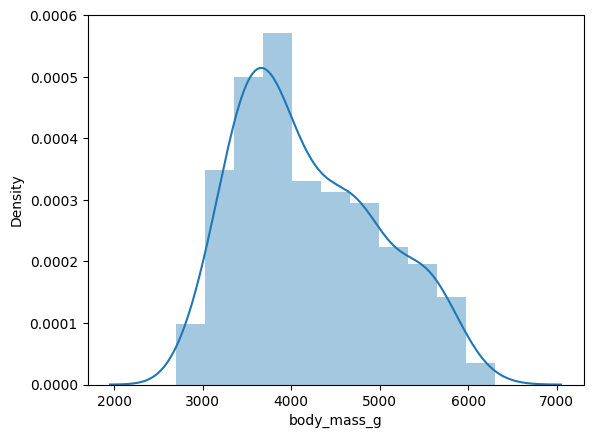

In [38]:
# Create a distribution plot for the 'body_mass_g' column of the DataFrame df using seaborn

sns.distplot(df.body_mass_g)

#####3.2. Perform Bivariate Analysis

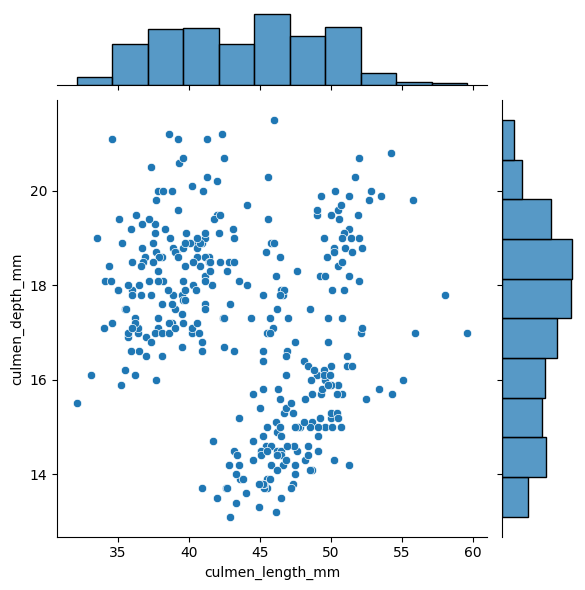

In [39]:
# Create a joint plot comparing 'culmen_length_mm' and 'culmen_depth_mm' columns from the DataFrame df using seaborn

sns.jointplot(x='culmen_length_mm',y='culmen_depth_mm',data=df)

#####3.3. Perform Multi-Variate Analysis

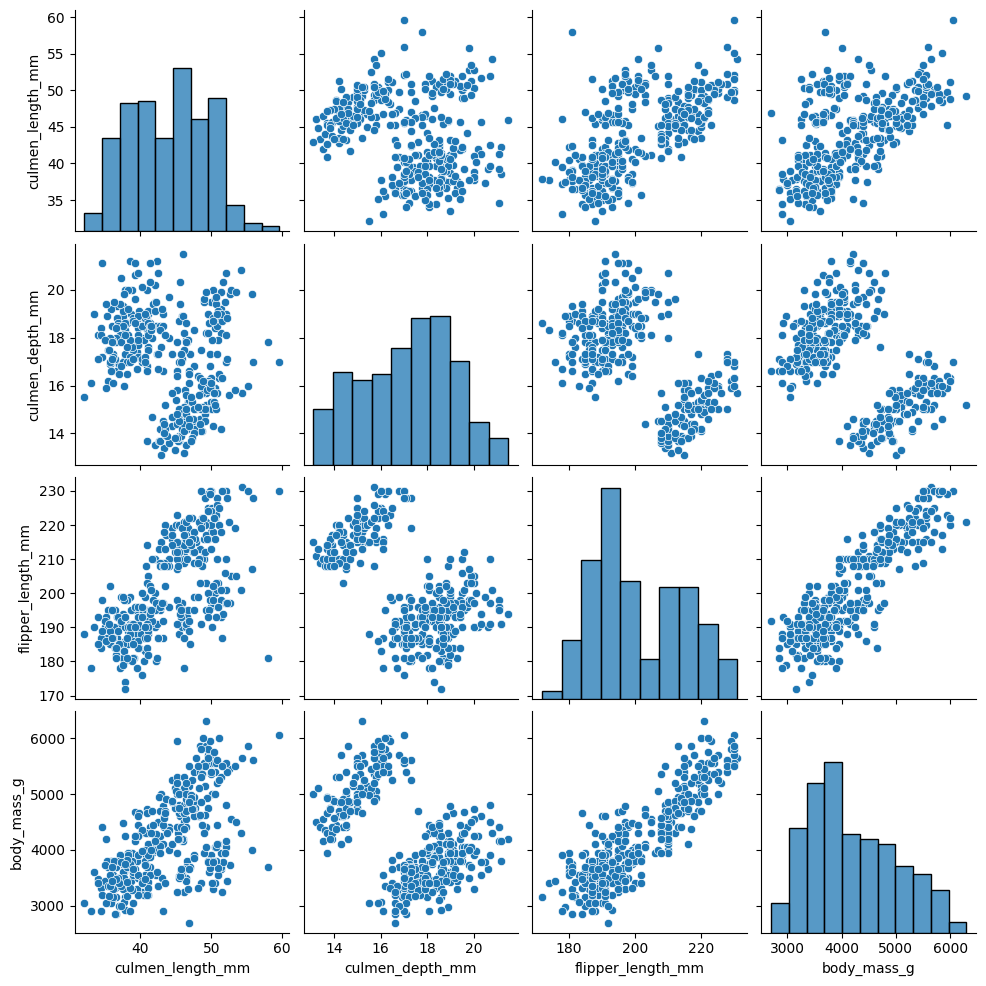

In [40]:
# Create a pair plot for all numerical columns in the DataFrame df using seaborn

sns.pairplot(df)

#####4. Perform descriptive statistics on the dataset.

In [41]:
# The code "df.describe()" computes basic statistics for all numerical columns in the DataFrame df.

df.describe()

culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         200.915205  4201.754386
std            5.459584         1.974793          14.061714   801.954536
min           32.100000        13.100000         172.000000  2700.000000
25%           39.225000        15.600000         190.000000  3550.000000
50%           44.450000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         213.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

#####5. Check for Missing values and deal with them.

In [42]:
df.isnull().any() #Checking is there any null values in our dataset

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [43]:
# The code "df.isnull().sum()" will return the sum of null values for each column in the DataFrame df.

df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [44]:
# Code to replace null values in numerical columns with MEDIAN
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace=True)

# Code to replace null values in categorical column with MODE
df['sex'].fillna(df['sex'].mode().iloc[0],inplace=True)

In [45]:
# Now all null values are replaced with median and mode and dealt properly.

df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

#####6. Find the outliers and replace the outliers

<Axes: ylabel='culmen_length_mm'>

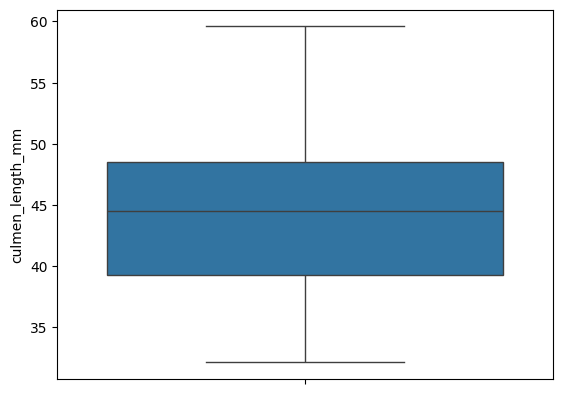

In [46]:
sns.boxplot(df.culmen_length_mm)

<Axes: ylabel='culmen_depth_mm'>

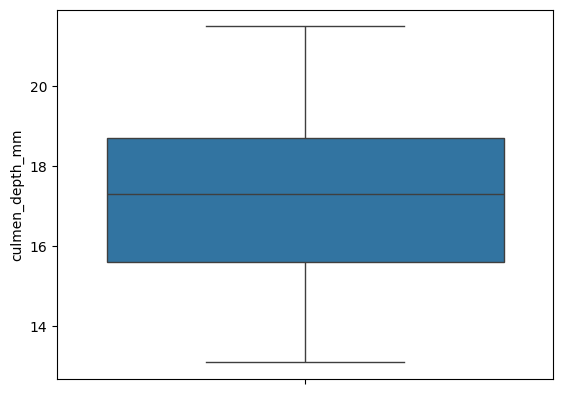

In [47]:
sns.boxplot(df.culmen_depth_mm)

<Axes: ylabel='flipper_length_mm'>

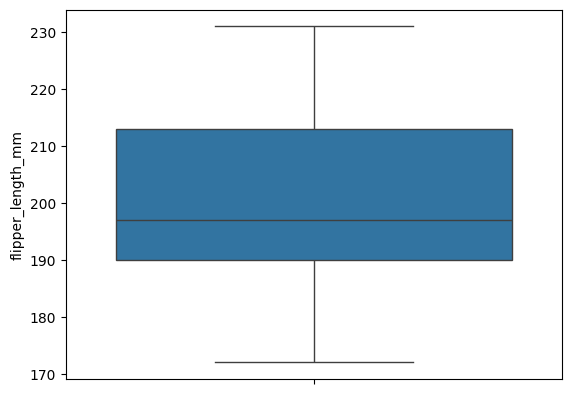

In [48]:
sns.boxplot(df.flipper_length_mm)

<Axes: ylabel='body_mass_g'>

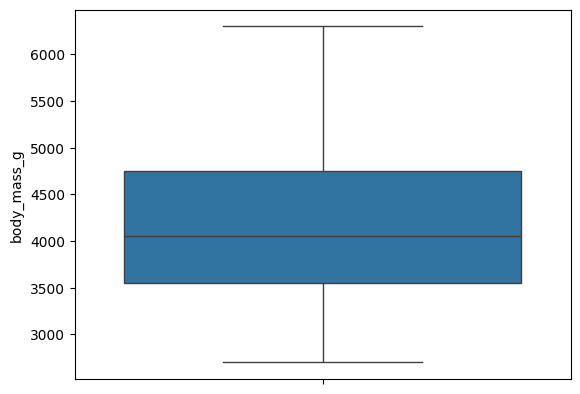

In [49]:
sns.boxplot(df.body_mass_g)

######Hence there are no outliers in the dataset.

#####7. Check for Categorical columns and perform encoding.

In [50]:
# The provided code uses the LabelEncoder from the sklearn.preprocessing library to encode the 'sex', 'species', and 'island' columns in the DataFrame df, and then displays the first few rows of the modified DataFrame.

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['species'] = le.fit_transform(df['species'])
df['island'] = le.fit_transform(df['island'])
df.head()

species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0        0       2             39.10             18.7              181.0   
1        0       2             39.50             17.4              186.0   
2        0       2             40.30             18.0              195.0   
3        0       2             44.45             17.3              197.0   
4        0       2             36.70             19.3              193.0   

   body_mass_g  sex  
0       3750.0    2  
1       3800.0    1  
2       3250.0    1  
3       4050.0    2  
4       3450.0    1

#####8. Check the correlation of independent variables with the target (TARGET IS SPECIES and remaining are independent)

In [51]:
df.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                 -0.003823
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

#####9. Split the data into dependent and independent variables

In [52]:
X=df.drop(columns=['species'],axis=1)
X.head()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0       2             39.10             18.7              181.0       3750.0   
1       2             39.50             17.4              186.0       3800.0   
2       2             40.30             18.0              195.0       3250.0   
3       2             44.45             17.3              197.0       4050.0   
4       2             36.70             19.3              193.0       3450.0   

   sex  
0    2  
1    1  
2    1  
3    2  
4    1

In [53]:
Y=df['species']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

#####10. Scaling the independent data

In [54]:
# Import the MinMaxScaler from the sklearn.preprocessing library
# Create an instance of MinMaxScaler and store it in the variable 'scale'
# Scale the features in the DataFrame X using the fit_transform method of the scaler
# Store the scaled features in a new DataFrame called X_scaled and set the column names to be the same as X
# Display the first few rows of the X_scaled DataFrame

from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X_scaled.head()

island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0     1.0          0.254545         0.666667           0.152542     0.291667   
1     1.0          0.269091         0.511905           0.237288     0.305556   
2     1.0          0.298182         0.583333           0.389831     0.152778   
3     1.0          0.449091         0.500000           0.423729     0.375000   
4     1.0          0.167273         0.738095           0.355932     0.208333   

   sex  
0  1.0  
1  0.5  
2  0.5  
3  1.0  
4  0.5

#####11. Split the data into training and testing


In [55]:
# Use the train_test_split function from the sklearn.model_selection library to split the scaled features X_scaled and the target variable Y into training and testing sets.
# The training set (X_train and Y_train) will contain 80% of the data, while the testing set (X_test and Y_test) will contain 20% of the data.
# The random_state parameter is set to 0 for reproducibility.

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=0)

#####12. Check the training and testing data shape.

In [56]:
X_train.shape

(275, 6)

In [57]:
X_test.shape

(69, 6)

In [58]:
Y_train.shape

(275,)

In [59]:
Y_test.shape

(69,)

12. Model Building

Linear Regression

In [60]:
# Import the LinearRegression class from the sklearn.linear_model library
# Create an instance of the LinearRegression model and store it in the variable 'model'
# Train the model using the training set X_train and Y_train using the fit method

from sklearn.linear_model import LinearRegression
model = LinearRegression() #Initialisation
model.fit(X_train,Y_train)

LinearRegression()

In [61]:
# Use the trained LinearRegression model to make predictions on the test set X_test and store the predictions in the variable Y_pred

Y_pred=model.predict(X_test)
Y_pred

array([ 2.65720500e-01,  7.83901452e-02,  2.02792358e-01,  2.05819294e+00,
       -8.07111897e-02,  1.85693694e+00,  1.97207848e-01,  1.25004308e+00,
        1.79833694e+00,  1.61683214e-01,  3.23598469e-01,  1.79554731e+00,
        1.03418642e-01,  1.83913962e+00,  1.87086805e+00,  2.75791073e-01,
        1.66952207e-01,  1.76349324e+00,  4.01217348e-01, -1.76295312e-02,
        1.74035570e+00,  1.14251944e-01,  9.14393888e-01,  7.12233851e-02,
        2.00182685e+00,  2.22639020e+00,  1.62800503e+00,  9.62111166e-02,
        2.81960260e-01,  1.63326067e+00,  1.89679529e+00,  8.11349477e-01,
        2.12897413e-03,  2.39211717e-01, -1.40826520e-01,  9.81899520e-01,
        1.99025297e+00,  8.59717315e-01, -1.73267426e-02,  4.39394406e-01,
       -9.53154559e-02,  3.84717869e-01,  2.32844087e-02,  1.88357571e+00,
        1.80515115e+00, -6.18240222e-02,  2.03025692e+00,  1.21913047e+00,
        8.09747953e-02,  2.03147910e+00, -2.03895563e-02,  1.40730816e-01,
        1.23830391e-01,  

In [67]:
# Use the trained LinearRegression model to make predictions on the training set X_train and store the predictions in the variable Y_pred1

Y_pred1=model.predict(X_train)
Y_pred1

array([-1.23923634e-01,  2.02411357e+00,  1.62873311e+00,  2.07889546e-01,
        8.35276187e-01,  2.26830883e+00,  2.06342187e-01, -1.85724739e-02,
        2.00183130e+00,  9.09136320e-01,  6.04785680e-01,  4.66451638e-01,
        8.15283126e-01,  2.24137854e-01,  6.27296683e-01,  5.23911078e-01,
        1.60228128e+00, -4.62492544e-03,  2.09419142e+00,  3.48234826e-01,
        8.05582924e-02,  2.06878946e+00,  1.60418577e+00,  3.47878379e-01,
        8.63384527e-01,  2.01701958e+00,  1.70661017e+00,  1.02514464e+00,
        1.95124100e+00,  2.15989917e-01,  5.39263063e-01,  2.76941068e-01,
        9.04869066e-03, -3.56250248e-01,  1.96122577e+00,  1.08053526e+00,
        2.11631476e+00,  1.85632776e+00,  2.47782377e+00,  8.54145656e-01,
        2.22185690e+00,  1.67009409e+00,  3.04689236e-01, -4.17974427e-01,
        2.33330764e-02,  8.34519885e-01,  1.91231739e-01,  2.92337675e-01,
        7.28229491e-01,  2.69924381e-01, -8.30351267e-02,  9.70360010e-01,
        1.31518689e-01,  

metrics for linear Regression

In [63]:
from sklearn import metrics

In [64]:
#R-square
#evaluating testing accuracy
print(metrics.r2_score(Y_test,Y_pred))

0.9462767448472971


In [65]:
#Evaluating training accuracy
print(metrics.r2_score(Y_train,Y_pred1))

0.9108682908356982


Correlation HeatMap

<Axes: >

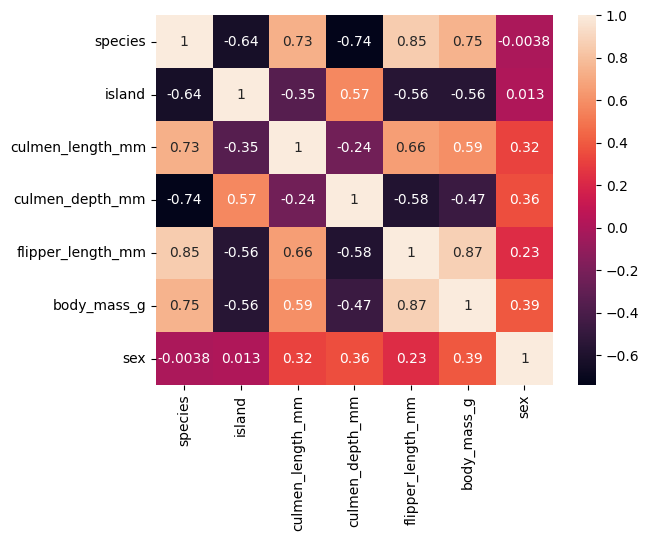

In [66]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

Interpretation of the Linear Regression Model

The linear regression model shows a high training accuracy with an R2 score of 0.946 and a slightly lower but still strong testing accuracy with an R2 score of 0.911. This indicates that the model performs well in predicting the target variable for the penguin species based on the given features. The high R2 scores suggest that the model explains a large proportion of the variance in the target variable, both in the training and testing datasets. Overall, the model appears to be effective in predicting the species of penguins based on the provided features.

### End of Lab-1_Linear Regression !!!